Accuracy: 0.93255
Confusion Matrix:
[[17230  1062]
 [  287  1421]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18292
           1       0.57      0.83      0.68      1708

    accuracy                           0.93     20000
   macro avg       0.78      0.89      0.82     20000
weighted avg       0.95      0.93      0.94     20000



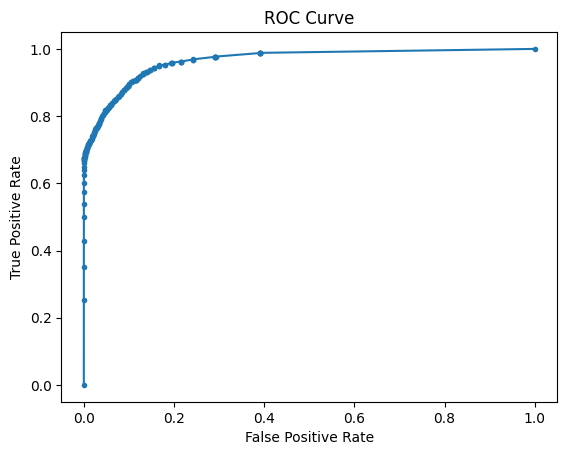

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from imblearn.over_sampling import SMOTE


file_path = '/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)


categorical_features = ['gender', 'smoking_history']
numerical_features = data.drop(columns=categorical_features + ['diabetes']).columns.tolist()


X = data.drop('diabetes', axis=1)
y = data['diabetes']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


X_transformed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)


y_pred_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Adjusting the threshold
y_pred = (y_pred_proba >= threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
